In [20]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.file import Subject
from pynwb.epoch import TimeIntervals
from pynwb.image import ImageSeries
from ndx_manoli_meta import AssayMetadata

In [2]:
# ----- Set up to interface with NWB files -----
nwbfile_path = os.path.join('M:\\','scn2a-paper-GWJSNH','NWB-files')
allnwb = []
allnwb += [each for each in os.listdir(nwbfile_path) if each.endswith('_introduction.nwb')]

In [27]:
# ----- Do stuff with the data in the files -----

# What do I actually want to do? Count up time spent huddling?

gts = []
sexes = []
snifftimes = []

for i,fname in enumerate(allnwb):

    # open file
    io = NWBHDF5IO(os.path.join(nwbfile_path,fname), mode="r+") # <-- open in write to append snippets?
    nwbfile = io.read()
    
    gts.append(nwbfile.subject.genotype)
    sexes.append(nwbfile.subject.sex)
    
    # calculate time spend in huddle
    bdat = nwbfile.intervals['annotated_behavior'].to_dataframe() # send the table to pandas format
    sniff_filt = bdat.behavior=='Sniff'
    durs_sniff = bdat.duration[sniff_filt]
    total_sniff = np.sum(durs_sniff)
    if total_sniff>500:
        print(fname)
    snifftimes.append(total_sniff)    
    
    io.close()

Nov22_Pair28_introduction.nwb


In [31]:
np.max(bdat.stop_time)-bdat.start_time[0]

1800.0

In [18]:
collate = {'GT' : gts, 'sex': sexes, 'sniff' : snifftimes}
ctab = pd.DataFrame(data=collate)

<AxesSubplot: xlabel='sex', ylabel='sniff'>

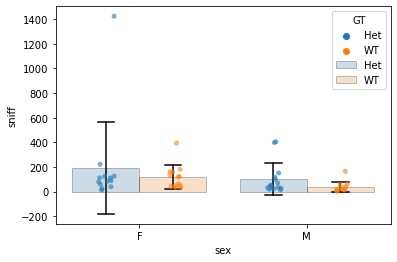

In [23]:
ax = sns.barplot(
    x="sex", 
    y="sniff", 
    hue="GT", 
    data=ctab, 
    errorbar="sd", 
    edgecolor="black",
    errcolor="black",
    errwidth=1.5,
    capsize = 0.1,
    alpha=0.25,
)

sns.stripplot(
    x="sex", 
    y="sniff", 
    hue="GT", 
    data=ctab, dodge=True, alpha=0.6, ax=ax,

)

In [26]:
snifftimes

[39.64699999999999,
 122.455,
 71.77799999999999,
 31.756,
 22.981,
 83.40299999999999,
 111.07900000000002,
 58.44199999999999,
 111.55899999999998,
 27.073999999999998,
 51.033,
 398.11400000000003,
 404.68399999999997,
 1423.525,
 12.665,
 47.936,
 78.29100000000001,
 161.81099999999998,
 32.669,
 31.131999999999998,
 150.61299999999997,
 34.480000000000004,
 125.434,
 12.726,
 23.630000000000003,
 13.247,
 23.775000000000002,
 39.433,
 16.039,
 18.499,
 163.584,
 34.51800000000001,
 117.93700000000003,
 7.892,
 23.321,
 60.202000000000005,
 32.697,
 47.032000000000004,
 0.741,
 101.09900000000003,
 181.209,
 60.592,
 13.911000000000003,
 159.762,
 221.43199999999996,
 393.016,
 132.49900000000002,
 41.784000000000006,
 62.635,
 49.928999999999995,
 124.29899999999999,
 88.231,
 120.331]

In [32]:
# figure out what's up with pair 28

fname = 'Nov22_Pair28_introduction.nwb'
io = NWBHDF5IO(os.path.join(nwbfile_path,fname), mode="r+") # <-- open in write to append snippets?
nwbfile = io.read()

# calculate time spend in huddle
bdat = nwbfile.intervals['annotated_behavior'].to_dataframe() # send the table to pandas format

In [40]:
timefilt = bdat.stop_time<bdat.start_time[0]+1800
sniff_filt = bdat.behavior=='Sniff'
durs_sniff = bdat.duration[sniff_filt&timefilt]
print(len(durs_sniff))
print(np.max(durs_sniff))
total_sniff = np.sum(durs_sniff)
print(total_sniff)
print(np.sum(bdat.duration[timefilt]))

1004
17.002
1409.574
20816.068


In [16]:
grpdat = []
for sex in np.unique(sexes):
    for gt in np.unique(gts):
        mask = np.logical_and(np.array(sexes)==sex, np.array(gts)==gt)
        grpdat.append(np.array(snifftimes)[mask])